## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive

After making a copy, add your student id, last name, and first name to the title.

In [ ]:
student_name = "Ricardo Sillas"
student_id = "88613474"

print("Identifying Information: ",student_name+","+student_id); # Don't change this line.

Identifying Information:  Ricardo Sillas,88613474


# Linear Regression

This assignment introduces linear regression with gradient descent, but starts with basic code building blocks.



## Overview

###Learning Objectives
* Practice manipulating numpy arrays.
* Generate artifical data, which can be useful for building intuition and debugging issues with complex models.
* Use Mean Squared Error to compare models.
* Understand generalization and overfitting.
* Work through the derivation of gradient descent for linear regression.
* Apply gradient descent to build intuition about training models.

### Grading

This lab (exercises 1-8) is worth a total of 100 points.

## Artificial Data

As a warm-up, let's get some practice manipulating matrices with numpy, plotting with matplotlib, and computing evaluation metrics for some simple models.

In [ ]:
# Import the libraries we'll use below.
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Print these to make sure you understand what is being generated.
A = np.array([1, 2, 3])
B = np.arange(1, 13).reshape(3, 4)
C = np.ones((2, 3))
D = np.eye(3)

In [ ]:
print(A, end = '\n\n')
print(B, end = '\n\n')
print(C, end = '\n\n')
print(D)

[1 2 3]

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

[[1. 1. 1.]
 [1. 1. 1.]]

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Exercise 1: Matrix manipulation (17.5pts)

Perform the following computations using numpy functions and print the results. Each can easily be expressed in a single line of code.

Hint: One of the below computations will fail, the error explains why it failed - identify a way to fix it. 

1. 2A + 1
2. Sum the rows of B
3. Sum the columns of B
4. Number of elements of B greater than 5
5. C + C
6. A * B
7. (B * B) - D

#### Student Solution

In [ ]:
# Number 1
print('Exercise 1, Question 1:\n', (A * 2)+1, end='\n\n')

# Number 2
print('Exercise 1, Question 2:\n', B.sum(axis=1), end='\n\n')

# Number 3
print('Exercise 1, Question 3:\n', B.sum(axis=0), end='\n\n')

# Number 4
print('Exercise 1, Question 4:\n', B[B > 5], end='\n\n')

# Number 5
print('Exercise 1, Question 5:\n', C + C, end='\n\n')

# Number 6
print('Exercise 1, Question 6:\n', np.dot(A, B), end='\n\n')

# Number 7
print('Exercise 1, Question 7:\n', np.dot(B, np.transpose(B))-D)

Exercise 1, Question 1:
 [3 5 7]

Exercise 1, Question 2:
 [10 26 42]

Exercise 1, Question 3:
 [15 18 21 24]

Exercise 1, Question 4:
 [ 6  7  8  9 10 11 12]

Exercise 1, Question 5:
 [[2. 2. 2.]
 [2. 2. 2.]]

Exercise 1, Question 6:
 [38 44 50 56]

Exercise 1, Question 7:
 [[ 29.  70. 110.]
 [ 70. 173. 278.]
 [110. 278. 445.]]


## Data for Supervised Learning
Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we predict an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value. The *output* is sometimes referred to as a *target* or a *label*.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

In [ ]:
def create_1d_data(num_examples=10, w=2, b=1, random_scale=1):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    random_scale: add uniform noise between -random_scale and +random_scale

  Returns:
    X and Y with shape (num_examples)
  """
  X = np.arange(num_examples)
  np.random.seed(4)  # consistent random number generation
  noise = np.random.uniform(low=-random_scale, high=random_scale, size=X.shape)
  Y = w * X + b + noise
  return X, Y

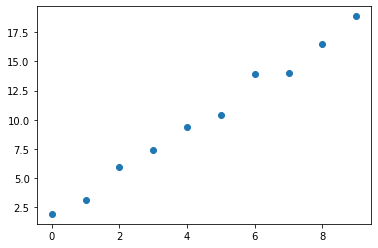

In [ ]:
# Create some artificial data using create_1d_data.
X, Y = create_1d_data()
plt.scatter(X, Y)
plt.show()

### Exercise 2: Models for Data (7.5 pts)
A model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x)  = x+5$ 
2. $M_2(x) = 2x+1$

Compute the predictions of models $M_1$ and $M_2$ for the values in $X$. These predictions should be vectors of the same shape as $Y$. Then plot the prediction lines of these two models overlayed on the "observed" data $(X, Y)$. Use [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to draw the lines.

#### Student Solution

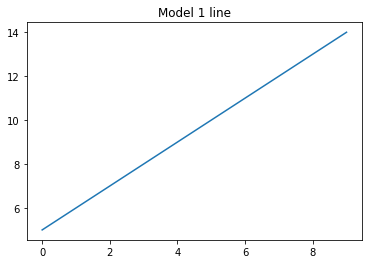

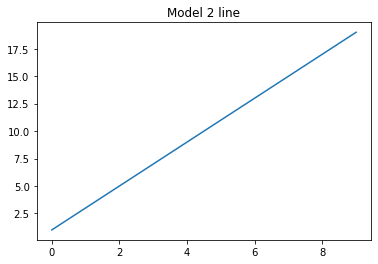

In [ ]:
# Number 1
M1 = X+5
plt.plot(M1)
plt.title('Model 1 line')
plt.show()

# Number 2
M2 = (2*X)+1
plt.plot(M2)
plt.title('Model 2 line')
plt.show()

## Evaluation Metrics

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{|Y|} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

### Exercise 3: Computing MSE (7.5 pts)
Write a function for computing the MSE metric and use it to compute the MSE for the two models above, $M_1$ and $M_2$. You should be able to do this **without using a for loop**.

#### Student Solution

In [ ]:
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values."""
  return np.mean(np.square(true_values-predicted_values))

In [ ]:
print(MSE(Y, M1))
print(MSE(Y, M2))

6.839502909434264
0.45821672338761366


## Generalization

Our data $(X, Y)$ represents just a sample of all possible input-output pairs we might care about. A model will be useful to the extent we can apply it to new inputs. Consider the more complex model below, which appears to produce a much smaller mean squared error.

MSE for M3: 0.10941956925529832


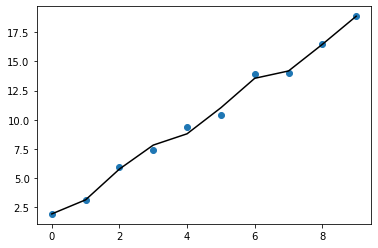

In [ ]:
# Fit an 8-th degree polynomial to (X, Y). See np.polyfit for details.
polynomial_model_coefficients = np.polyfit(X, Y, deg=8)
polynomial_model = np.poly1d(polynomial_model_coefficients)
M3 = polynomial_model(X)
fig = plt.scatter(X, Y)
plt.plot(X, M3, '-k')
print ('MSE for M3:', MSE(Y, M3))

### Exercise 4: Generalization (10 pts)
Apply models M2 and M3 to the test data below. Print the predicted outputs of the models and compare the MSE between the predictions and true values (Y_test).

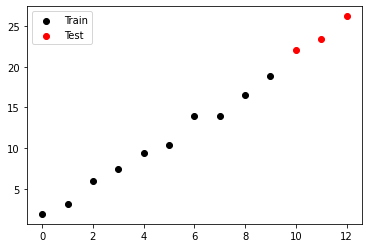

In [ ]:
# Suppose we have the following test data:
X_test = np.array([10, 11, 12])
Y_test = np.array([22.1, 23.4, 26.2])

# Plot train and test data.
plt.scatter(X, Y, color='k', label='Train')
plt.scatter(X_test, Y_test, color='r', label='Test')
plt.legend()
plt.show()

#### Student Solution

In [ ]:
M2_predictions=(2*X_test)+1
M3_predictions=polynomial_model(X_test)
print('M2 predicted output: ', M2_predictions)
print('M3 predicted output: ', M3_predictions)
print('M2 MSE: ', MSE(Y_test,M2_predictions))
print('M3 MSE: ', MSE(Y_test,M3_predictions))

M2 predicted output:  [21 23 25]
M3 predicted output:  [  -55.48822841  -549.7061869  -2464.434493  ]
M2 MSE:  0.9366666666666669
M3 MSE:  2179243.6041206564


## Notation
In our artificial data, things are pretty simple: each input example is just a single value. But soon, each input example will include multiple values or *features*, so we need some conventions to avoid confusion.

Let's start with the inputs:

\begin{align}
X =
\begin{pmatrix}
x^{(0)} \\
x^{(1)} \\
\vdots \\
x^{(m-1)}
\end{pmatrix}
\end{align}

* Capital $X$ refers to all input examples together.
* Lowercase $x$ refers to an individual input example; we use $x^{(i)}$ to refer to input example $i$; there are $m$ total examples.

Further, each input example $x$ could itself be a vector of feature values:

\begin{align}
x = [x_0, x_1, \dots x_{n-1}]
\end{align}

* Lowercase $x$ refers to all input features together for an individual input example.
* $x_i$ refers to feature $i$ for an input example $x$; there are $n$ total features.

Similarly, we can index labels $y^{(i)}$ in $Y$, which we can think of as a column vector where $y^{(i)}$ is the label for $x^{(i)}$.

\begin{align}
Y =
\begin{pmatrix}
y^{(0)} \\
y^{(1)} \\
\vdots \\
y^{(m-1)}
\end{pmatrix}
\end{align}

In general, we're using matrix notation. Rows refer to examples and columns refer to features. If we want to be very specific and refer to a particular feature of a particular input example, we can use $x_{i,j}$ for input $i$, feature $j$. Using matrices will be useful for coding ML algorithms since most of the operations we will do can be expressed as operations on matrices.


##Parameter Vectors
Let's prepare to learn a linear model $h(x)$ that approximates values of $Y$ from corresponding values of $X$. Since our input data has only one feature, our model will have two parameters (also called weights), which we'll refer to collectively as $W$:

\begin{align}
h(x) = w_0 + w_1x
\end{align}

Notice that if we prepend an extra feature (column) to $X$ that is always $1$, we can rewrite our model using a matrix multiplication:

\begin{align}
h(x) = w_0x_0 + w_1x_1 = xW^T
\end{align}

To make this matrix formulation as clear as possible, this is:

\begin{align}
\hat{y} = xW^T =
\begin{pmatrix}
x_0 & x_1 \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
\end{pmatrix}
\end{align}

In addition, if we wanted to apply our model to *all* inputs $X$, we could simply use $XW^T$:

\begin{align}
\hat{Y} = XW^T =
\begin{pmatrix}
x_{0,0} & x_{0,1} \\
x_{1,0} & x_{1,1} \\
\vdots & \vdots \\
x_{m-1,0} & x_{m-1,1} \\
\end{pmatrix}
\begin{pmatrix}
w_0 \\
w_1 \\
\end{pmatrix}
\end{align}

Remember that [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) requires the inner dimensions to line up: 

\begin{align}
X_{\{m \times n\}} W^T_{\{n \times 1 \}}  = \hat{Y}_{\{m \times 1 \}}
\end{align}

### Exercise 5: Practice with Parameters (12.5 pts)
Add a column of 1s to $X$. Then, use matrix multiplication (np.dot) to apply $M_1$ and $M_2$ (from above) to produce vectors of predictions. Print the shapes of the predictions to validate that they have the same shape as $Y$.

#### Student Solution

In [ ]:
# Add a column of 1s to X by using np.c_ to concatenate with the current values.
print(X)
X_with_1s = np.c_[np.ones(X.shape[0]), X]
print(X_with_1s)

M1 = np.array([5,1])
M2 = np.array([1,2])

M1_predictions=np.dot(X_with_1s,M1)
M2_predictions=np.dot(X_with_1s,M2)

print('The shape of Y is: ', np.shape(Y), end='\n')
print('The shape of the M1 prediction is: ', np.shape(M1_predictions), end='\n')
print('The shape of the M2 prediction is: ', np.shape(M2_predictions))

[0 1 2 3 4 5 6 7 8 9]
[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]
The shape of Y is:  (10,)
The shape of the M1 prediction is:  (10,)
The shape of the M2 prediction is:  (10,)


## Gradient Descent
Here we'll demonstrate gradient descent for linear regression to learn the weight vector $W$. We'll use the more specific notation $h_W(x)$ since we want to specify that $h$ is parameterized by $W$. As above, we'll assume that $x_0=1$ so we can write $h$ as a sum or a matrix product:

\begin{align}
h_W(x) = \sum_{i=0}^{n-1} w_i x_i = x W^T
\end{align}

In the derivation that follows, we'll use summations, but in the code below, we'll use matrix computations.

In linear regression, we compute the loss, $J(W)$ from the mean squared difference between predictions $h_W(x)$ and targets $y$. In the following equation, we average the loss over each of the $m$ training examples.

\begin{align}
J(W) = \frac{1}{2m} \sum_{i=0}^{m-1} (h_W(x^{(i)}) - y^{(i)})^2
\end{align}

Dividing by $2$ simplifies the formula of the gradient, since it cancels out the constant $2$ from by the derivative of the squared term (see below). Remember that the gradient is a vector of partial derivatives for each $w_j$ (holding the other elements of $w$ constant). The gradient points in direction of steepest ascent for the loss function $J$.

Here we derive the parameter update rule by computing the gradient of the loss function. We need a derivative for each feature in $x$, so we'll show how to compute the derivative with respect to $w_j$. For simplicity, let's assume we have only one training example ($m = 1$):

\begin{align}
\frac{\partial}{\partial w_j} J(W) &= \frac{\partial}{\partial w_j} \frac{1}{2} (h_W(x) - y)^2 \tag{1}\\
&= 2 \cdot \frac{1}{2} (h_W(x) - y) \cdot \frac{\partial}{\partial w_j} (h_W(x) - y) \tag{2}\\
&= (h_W(x) - y) \frac{\partial}{\partial w_j} \left(\sum_{i=0}^{n-1} w_i x_i - y \right) \tag{3}\\
&= (h_W(x) - y)x_j \tag{4}
\end{align}

The derivation has 2 key steps:

(1) Apply the [chain rule](https://en.wikipedia.org/wiki/Chain_rule) (step 1 -> 2).

(2) The derivative with respect to $w_j$ of $h_W(x)$ is only non-zero for $w_j x_j$. For this component, the derivative is $x_j$ since the feature value is treated as a constant (step 3 -> 4).

Ok, that's it. We can now implement gradient descent for linear regression. The only difference in the code below is that it computes the loss as an average over all training examples (rather than just a single example).

### Exercise 6: Implementing Gradient Descent for Linear Regression (20 pts)
Fill in the `NotImplemented` parts of the gradient descent function below. There are detailed comments to help guide you. Note that this function uses vectors and matrices so you'll want to use numpy functions like `np.dot` to multiply them, for example.

##### Student Solution

In [ ]:
def gradient_descent(inputs, outputs, learning_rate, num_epochs):
  """Apply the gradient descent algorithm to learn learn linear regression.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    learning_rate: The learning rate to use for updates.
    num_epochs: The number of passes through the full training data.

  Returns:
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # m = number of examples, n = number of features
  m, n = inputs.shape
  
  # We'll use a vector of size n to store the learned weights and initialize
  # all weights to 1. 
  W = np.ones(n)
  
  # Keep track of the training loss and weights after each step.
  losses = []
  weights = []
  
  for epoch in range(num_epochs):
      # Append the old weights to the weights list to keep track of them.
      weights.append(W)

      # Evaluate the current predictions for the training examples given
      # the current estimate of W (you did this in exercise 5). 
      predictions = np.dot(inputs, W)
      
      # Find the difference between the predictions and the actual targetvalues.
      diff = predictions-outputs
      
      # In standard linear regression, we want to minimize the sum of squared
      # differences. Find the loss as we did in Excerise 3 .
      loss = np.mean(np.square(diff))/2

      # Append the loss to the losses list to keep a track of it.
      losses.append(loss)
      
      # Compute the gradient with respect to the loss.
      # [Formula (4) in the Gradient Descent Implementation]
      gradient = np.dot(diff, inputs)/m

      # Update weights, scaling the gradient by the learning rate.
      W = W - learning_rate * gradient
      
  return np.array(weights), np.array(losses)

Let's try running gradient descent with our artificial data and print out the results. Note that we're passing the version of the input data with a column of $1s$ so that we learn an *intercept* (also called a *bias*). We can also try learning without the intercept.

Note: if your implementation of gradient descent is correct, you should get a loss of ~0.20458 after 5 epochs (with a bias parameter).

In [ ]:
print('Running gradient descent...')
weights, losses = gradient_descent(X_with_1s, Y, learning_rate=.02,
                                   num_epochs=5)
for W, loss in zip(weights, losses):
  print(loss, W)

print('\nRunning gradient descent without biases...')
# Make sure we're providing an input with the right 2-D shape.
X_without_1s = np.expand_dims(X, axis=0).T
weights_without_bias, losses_without_bias = gradient_descent(X_without_1s, Y,
                                                             .02, num_epochs=5)
for W, loss in zip(weights_without_bias, losses_without_bias):
  print(loss, W)

Running gradient descent...
14.048438948137147 [1. 1.]
2.587505785523394 [1.09314344 1.56138661]
0.6069656331657971 [1.13389921 1.79439995]
0.26428920553799407 [1.15286867 1.89092766]
0.20458024419415088 [1.16277124 1.93072732]

Running gradient descent without biases...
19.20561082149215 [1.]
4.036724305150967 [1.65138661]
1.2319971882794838 [1.93148285]
0.713403144369946 [2.05192424]
0.6175151056510735 [2.10371403]


### Exercise 7: Interpreting the Model (12.5 pts)
Write down the learned model with and without an intercept term. Which model fits the data better?

#### Student Solution
The first model (M1) uses bias \
The second model (M2) is without biases
<br><br>
M1 = 1.16277124+1.93072732x \
M2 = 2.10371403x
<br><br>
The first model fits the data better because it has a lower loss

## Gradient Descent Progress
Let's write a function that lets us visualize the progress of gradient descent during training. Our gradient descent function already provides intermediate weight vectors and losses after each epoch, so we just need to plot these.

In [ ]:
def plot_learning(inputs, outputs, weights, losses):
  """Plot predictions and losses after each training epoch.

  Args:
    inputs: A 2-D array where each column is an input feature and each
            row is a training example.
    outputs: A 1-D array containing the real-valued
             label corresponding to the input data in the same row.
    weights: A 2-D array with the learned weights after each training epoch.
    losses: A 1-D array with the loss after each epoch.
  """
  # Create a figure.
  plt.figure(1, figsize=[10,4])

  # The first subplot will contain the predictions. Start by plotting the
  # outputs (Y).
  plt.subplot(121)
  plt.xlabel('x')
  plt.ylabel('y')
  plt.xticks(inputs[:,1])
  plt.scatter(inputs[:,1], outputs, color='black', label='Y')
  
  # For each epoch, retrieve the estimated weights W, compute predictions, and
  # plot the resulting line.
  num_epochs = len(weights)
  for i in range(num_epochs):
    W = weights[i]
    predictions = np.dot(inputs, W.T)
    plt.plot(inputs[:,1], predictions, label='Epoch %d' %i)
  plt.legend()

  # The second subplot will contain the losses.
  plt.subplot(122)
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.xticks(range(num_epochs))
  plt.plot(range(num_epochs), losses, marker='o', color='black',
           linestyle='dashed')
  plt.show()

### Exercise 8: Plotting Progress (12.5 pts)

Re-run gradient descent using X_with_1s, but this time with learning_rate=0.01 and num_epochs=7.

Run the plot_learning function using the weights and losses returned by gradient_descent (from above) and answer the following questions:

1. Is learning converging faster or slower than when we used learning_rate=0.02?
2. If you continue training, will the loss eventually reach 0?
3. If you continue training, will the model eventually converge to $h(x)=2x+1$?

#### Student Solution

Running gradient descent...
14.048438948137147 [1. 1.]
7.135322810338647 [1.04657172 1.28069331]
3.6715956735237585 [1.08004652 1.47929329]
1.9360626422854648 [1.10424958 1.61978592]
1.0663804539641 [1.12188843 1.71914901]
0.6305027965000122 [1.13487956 1.78939986]
0.41196828385308093 [1.14457949 1.83904463]


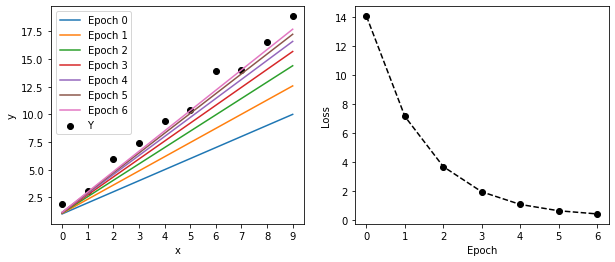

In [ ]:
print('Running gradient descent...')
weights, losses = gradient_descent(X_with_1s, Y, learning_rate=.01,
                                   num_epochs=7)

for W, loss in zip(weights, losses):
  print(loss, W)

plot_learning(X_with_1s, Y, weights, losses)

WRITE YOUR ANSWERS HERE

1. Learning is converging slower when we used learning_rate=0.02
2. The loss will not eventually reach 0
3. If you continue training, the model will not eventually converge to $h(x)=2x+1$

## Submission Instructions

1. File > Download .ipynb
2. Go to Blackboard, find the submission page, and upload the .ipynb file you just downloaded.